## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import norm
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>




y = -x + 2

In [2]:
x = np.linspace(0, 20, 21)
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [3]:
y = []
for x_value in x:
    y.append(-2 * x_value + 1)
y = np.array(y)
y

array([  1.,  -1.,  -3.,  -5.,  -7.,  -9., -11., -13., -15., -17., -19.,
       -21., -23., -25., -27., -29., -31., -33., -35., -37., -39.])

#### Plot your data points. 

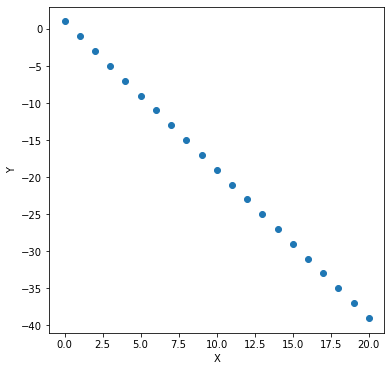

In [4]:
plt.figure(figsize=(6,6));
plt.scatter(x,y);
plt.xlabel("X");
plt.ylabel("Y");

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [5]:
def Batch_Linear_Regression(inputs, outputs, learning_rate):
    
    x0 = np.ones(len(inputs))
    theta_0 = 0
    theta_1 = 0
    DeltaJ_theta_0 = 1
    DeltaJ_theta_1 = 1
    
    Loss_Function = []
    thetas_0 = []
    thetas_1 = []
    hs = []
    
    while abs(DeltaJ_theta_0) > 0.001 or abs(DeltaJ_theta_1) > 0.001:

        #Hypothesis Function
        h = (np.array([x0, inputs]).T) @ (np.array([theta_0, theta_1]).T)
        hs.append(h)
        
        #Loss Function
        J = (1/(2 * len(inputs))) * (norm(h-outputs)**2)
        Loss_Function.append(J)

        #Gradiants
        DeltaJ_theta_0 = (1 / len(inputs)) * ((h - outputs) @ x0)
        DeltaJ_theta_1 = (1 / len(inputs)) * ((h - outputs) @ inputs)

        #New Thetas
        theta_0 = theta_0 - (learning_rate * DeltaJ_theta_0)
        theta_1 = theta_1 - (learning_rate * DeltaJ_theta_1)

        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        
    return theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs

In [6]:
#Try Function
theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs = Batch_Linear_Regression(x, y, 0.01)

In [7]:
#Results
print(f'Theta 0 = {theta_0}')
print(f'Theta 1 = {theta_1}')

r2 = r2_score(h , y)
print(f'R2 Score = {r2}')

Theta 0 = 0.9962637359819491
Theta 1 = -1.9997260799600696
R2 Score = 0.9999999743198611


In [8]:
epochs = list(range(1, len(Loss_Function)+1))

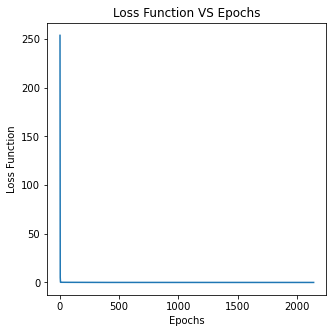

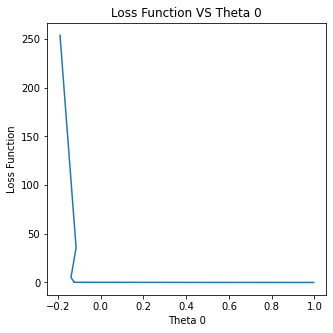

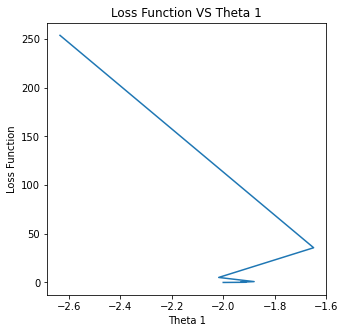

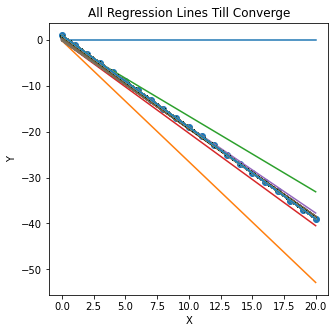

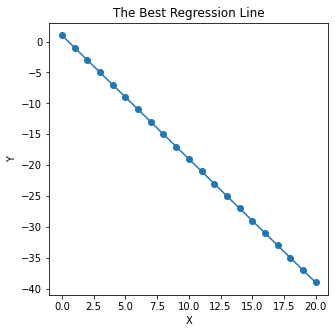

In [11]:
#Loss Function VS Epochs
plt.figure(figsize=(5, 5));
plt.xlabel('Epochs');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Epochs');
plt.plot(epochs, Loss_Function);

#Loss Function VS Theta 0
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 0');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 0');
plt.plot(thetas_0, Loss_Function);

#Loss Function VS Theta 1
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 1');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 1');
plt.plot(thetas_1, Loss_Function);

#All Regression Lines Till Converge
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('All Regression Lines Till Converge');
for i in hs:
    plt.plot(x, i)
    
#The Best Regression Line
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('The Best Regression Line');
plt.plot(x, h);

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

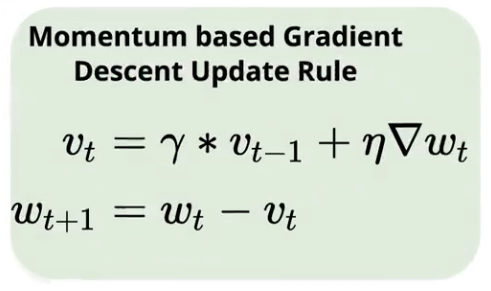

#### γ takes values between 0 and 1.
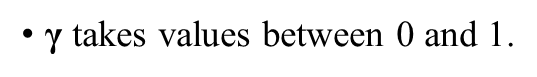

In [12]:
def Momentum_Based_LR(inputs, outputs, learning_rate, momentum_rate):
    
    x0 = np.ones(len(inputs))
    theta_0 = 0
    
    theta_1 = 0
    Vt_theta0 = 0
    Vt_theta1 = 0
    DeltaJ_theta_0 = 1
    DeltaJ_theta_1 = 1
    
    Loss_Function = []
    thetas_0 = []
    thetas_1 = []
    hs = []
    
    while abs(DeltaJ_theta_0) > 0.001 or abs(DeltaJ_theta_1) > 0.001:

        #Hypothesis Function
        h = (np.array([x0, inputs]).T) @ (np.array([theta_0, theta_1]).T)
        hs.append(h)

        #Loss Function
        J = (1/(2 * len(inputs))) * (norm(h-outputs)**2)
        Loss_Function.append(J)

        #Gradiants
        DeltaJ_theta_0 = (1 / len(inputs)) * ((h - outputs) @ x0)
        DeltaJ_theta_1 = (1 / len(inputs)) * ((h - outputs) @ inputs)
        
        #Vs
        Vt_theta0 = (momentum_rate * Vt_theta0 + learning_rate * DeltaJ_theta_0)
        Vt_theta1 = (momentum_rate * Vt_theta1 + learning_rate * DeltaJ_theta_1)
        
        #New Thetas
        theta_0 = theta_0 - Vt_theta0
        theta_1 = theta_1 - Vt_theta1

        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        
    return theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs

In [17]:
#Try Function
theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs = Momentum_Based_LR(x, y, 0.001, 0.5)

In [18]:
#Results
print(f'Theta 0 = {theta_0}')
print(f'Theta 1 = {theta_1}')

r2 = r2_score(h , y)
print(f'R2 Score = {r2}')

Theta 0 = 0.9962562990270015
Theta 1 = -1.999725534727991
R2 Score = 0.9999999743275407


In [19]:
epochs = list(range(1, len(Loss_Function)+1))

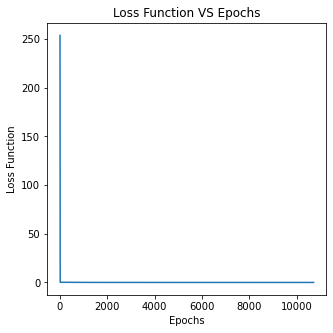

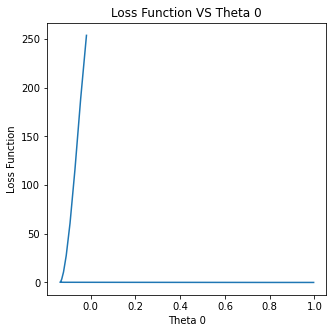

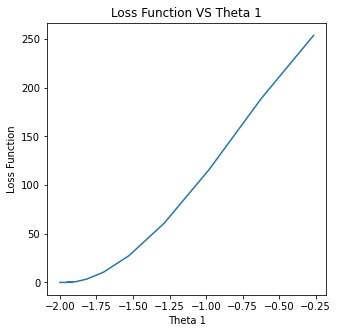

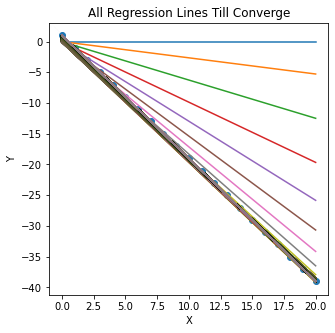

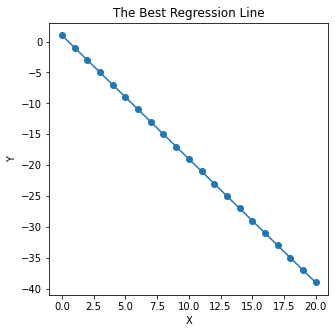

In [20]:
#Loss Function VS Epochs
plt.figure(figsize=(5, 5));
plt.xlabel('Epochs');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Epochs');
plt.plot(epochs, Loss_Function);

#Loss Function VS Theta 0
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 0');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 0');
plt.plot(thetas_0, Loss_Function);

#Loss Function VS Theta 1
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 1');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 1');
plt.plot(thetas_1, Loss_Function);

#All Regression Lines Till Converge
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('All Regression Lines Till Converge');
for i in hs:
    plt.plot(x, i)
    
#The Best Regression Line
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('The Best Regression Line');
plt.plot(x, h);

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [21]:
#Trial 1 
theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs = Momentum_Based_LR(x, y, 0.001, 0.99)

In [22]:
#Results
print(f'Theta 0 = {theta_0}')
print(f'Theta 1 = {theta_1}')

r2 = r2_score(h , y)
print(f'R2 Score = {r2}')

Theta 0 = 0.998575875246912
Theta 1 = -1.9987130399736608
R2 Score = 0.999999995670142


In [23]:
epochs = list(range(1, len(Loss_Function)+1))

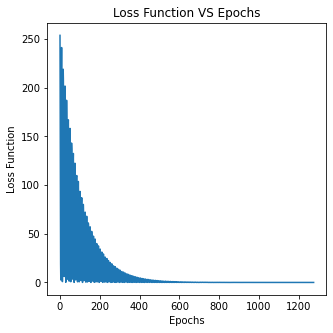

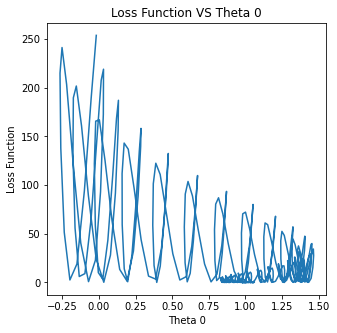

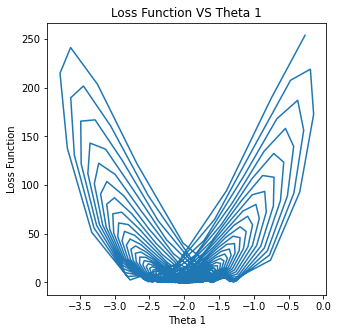

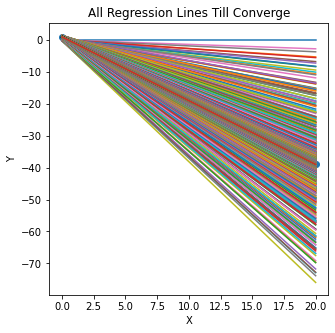

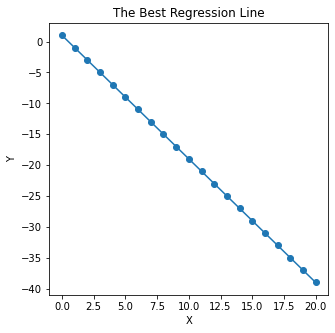

In [24]:
#Loss Function VS Epochs
plt.figure(figsize=(5, 5));
plt.xlabel('Epochs');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Epochs');
plt.plot(epochs, Loss_Function);

#Loss Function VS Theta 0
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 0');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 0');
plt.plot(thetas_0, Loss_Function);

#Loss Function VS Theta 1
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 1');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 1');
plt.plot(thetas_1, Loss_Function);

#All Regression Lines Till Converge
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('All Regression Lines Till Converge');
for i in hs:
    plt.plot(x, i)
    
#The Best Regression Line
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('The Best Regression Line');
plt.plot(x, h);

In [25]:
#Trial 2
theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs = Momentum_Based_LR(x, y, 0.001, 0.1)

In [26]:
#Results
print(f'Theta 0 = {theta_0}')
print(f'Theta 1 = {theta_1}')

r2 = r2_score(h , y)
print(f'R2 Score = {r2}')

Theta 0 = 0.9962544488287985
Theta 1 = -1.9997253990827684
R2 Score = 0.999999974314365


In [27]:
epochs = list(range(1, len(Loss_Function)+1))

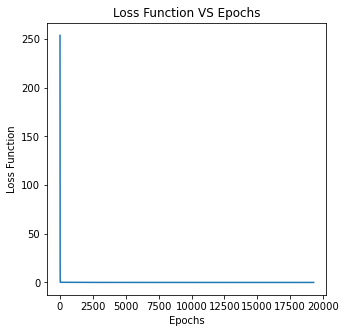

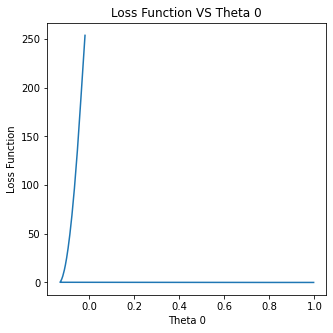

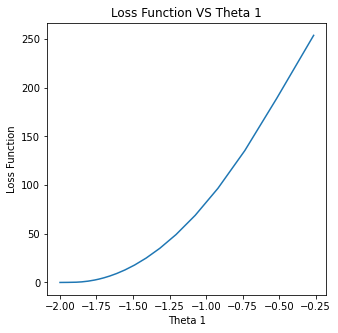

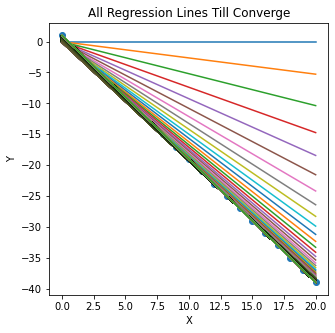

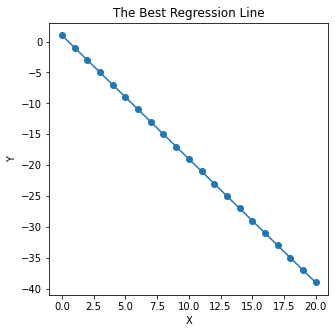

In [28]:
#Loss Function VS Epochs
plt.figure(figsize=(5, 5));
plt.xlabel('Epochs');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Epochs');
plt.plot(epochs, Loss_Function);

#Loss Function VS Theta 0
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 0');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 0');
plt.plot(thetas_0, Loss_Function);

#Loss Function VS Theta 1
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 1');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 1');
plt.plot(thetas_1, Loss_Function);

#All Regression Lines Till Converge
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('All Regression Lines Till Converge');
for i in hs:
    plt.plot(x, i)
    
#The Best Regression Line
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('The Best Regression Line');
plt.plot(x, h);

In [29]:
#Trial 3
theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs = Momentum_Based_LR(x, y, 0.001, 0)

In [22]:
#Results
print(f'Theta 0 = {theta_0}')
print(f'Theta 1 = {theta_1}')

r2 = r2_score(h , y)
print(f'R2 Score = {r2}')

Theta 0 = 0.998575875246912
Theta 1 = -1.9987130399736608
R2 Score = 0.999999995670142


In [30]:
epochs = list(range(1, len(Loss_Function)+1))

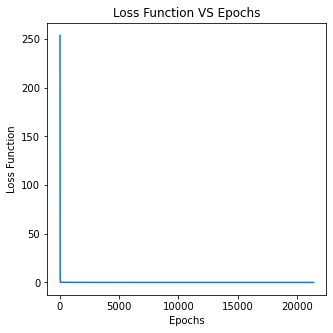

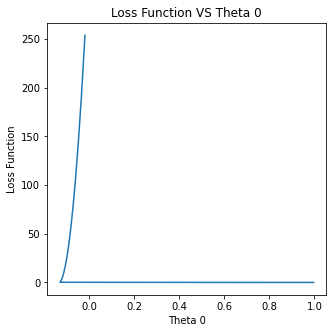

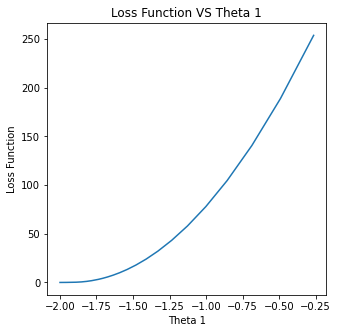

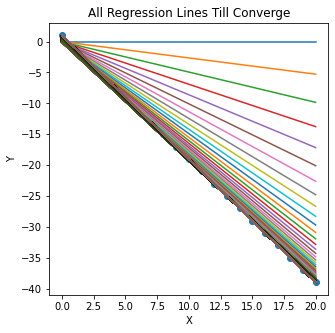

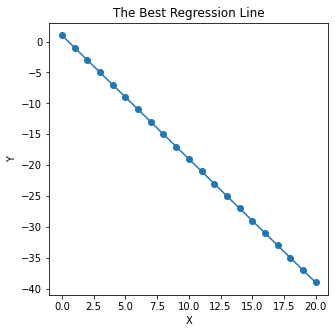

In [31]:
#Loss Function VS Epochs
plt.figure(figsize=(5, 5));
plt.xlabel('Epochs');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Epochs');
plt.plot(epochs, Loss_Function);

#Loss Function VS Theta 0
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 0');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 0');
plt.plot(thetas_0, Loss_Function);

#Loss Function VS Theta 1
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 1');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 1');
plt.plot(thetas_1, Loss_Function);

#All Regression Lines Till Converge
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('All Regression Lines Till Converge');
for i in hs:
    plt.plot(x, i)
    
#The Best Regression Line
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('The Best Regression Line');
plt.plot(x, h);

### Update your Batch GD for one variable  implementation to be NAG and check your results

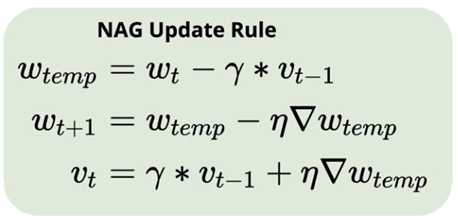

In [32]:
def NAG_LR(inputs, outputs, learning_rate, momentum_rate):
    
    x0 = np.ones(len(inputs))
    theta_0 = 0
    
    theta_1 = 0
    Vt_theta0 = 0
    Vt_theta1 = 0
    DeltaJ_theta_0 = 1
    DeltaJ_theta_1 = 1
    
    Loss_Function = []
    thetas_0 = []
    thetas_1 = []
    hs = []
    
    while abs(DeltaJ_theta_0) > 0.001 or abs(DeltaJ_theta_1) > 0.001:

        #Hypothesis Function
        h = (np.array([x0, inputs]).T) @ (np.array([theta_0, theta_1]).T)
        hs.append(h)

        #Loss Function
        J = (1/(2 * len(inputs))) * (norm(h-outputs)**2)
        Loss_Function.append(J)
        
        #New Thetas Temp
        theta_0_temp = theta_0 - momentum_rate * Vt_theta0
        theta_1_temp = theta_1 - momentum_rate * Vt_theta1
        
        #Gradiants Temp
        h_temp = (np.array([x0, inputs]).T) @ (np.array([theta_0_temp, theta_1_temp]).T)
        DeltaJ_theta_0_temp = (1 / len(inputs)) * ((h_temp - outputs) @ x0)
        DeltaJ_theta_1_temp = (1 / len(inputs)) * ((h_temp - outputs) @ inputs)
        
        #Vs
        Vt_theta0 = (momentum_rate * Vt_theta0 + learning_rate * DeltaJ_theta_0_temp)
        Vt_theta1 = (momentum_rate * Vt_theta1 + learning_rate * DeltaJ_theta_1_temp)
        
        #New Thetas
        theta_0 = theta_0_temp - (learning_rate * DeltaJ_theta_0_temp)
        theta_1 = theta_1_temp - (learning_rate * DeltaJ_theta_1_temp)

        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        
    return theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs

In [34]:
#Try Function
theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs = Momentum_Based_LR(x, y, 0.001, 0.9)

In [35]:
#Results
print(f'Theta 0 = {theta_0}')
print(f'Theta 1 = {theta_1}')

r2 = r2_score(h , y)
print(f'R2 Score = {r2}')

Theta 0 = 0.9962693949694973
Theta 1 = -1.9997264948424462
R2 Score = 0.999999974394134


In [36]:
epochs = list(range(1, len(Loss_Function)+1))

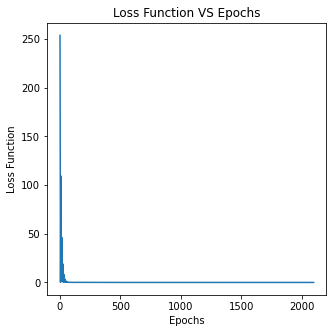

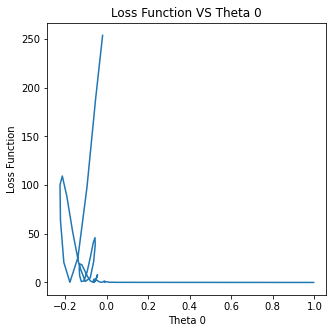

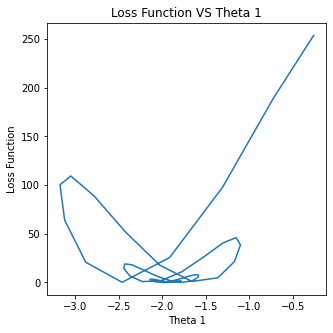

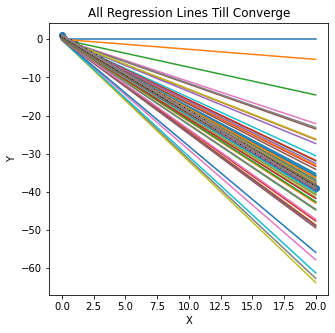

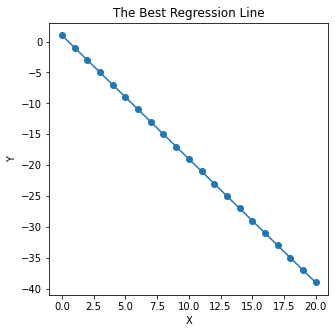

In [37]:
#Loss Function VS Epochs
plt.figure(figsize=(5, 5));
plt.xlabel('Epochs');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Epochs');
plt.plot(epochs, Loss_Function);

#Loss Function VS Theta 0
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 0');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 0');
plt.plot(thetas_0, Loss_Function);

#Loss Function VS Theta 1
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 1');
plt.ylabel('Loss Function');
plt.title('Loss Function VS Theta 1');
plt.plot(thetas_1, Loss_Function);

#All Regression Lines Till Converge
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('All Regression Lines Till Converge');
for i in hs:
    plt.plot(x, i)
    
#The Best Regression Line
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.title('The Best Regression Line');
plt.plot(x, h);

## Congratulations 
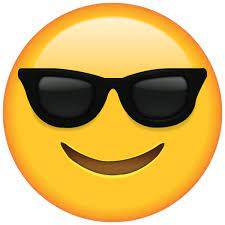